Функция генерации определенного количества СВ
Выборки: 10, 100, 1000, 10000, 100000

Случайные величины:
1) Биномиальное распределение
2) Распределение Бернулли
3) Геометрическое распределение
4) Распределение Пуассона
5) Экспоненциальное распределение
6) Равномерное распределение
7) Нормальное распределение
8) Распределение хи-квадрат
9) Распределение Стьюдента
10) Распределение Фишера
11) Распределение Вейбулла 

Для выборок:
1) посчитать оценки (мат ожидание, СКО в 2 видах - смещенное, несмещенное, медиана)
2) добавить шум в данные (до 20% мощности сигнала). Попробовать вписать данные в функцию, посчитать корреляцию и ковариацию для исходного и зашумленного ряда
    1) шум распределен по этому же закону
    2) по некоторому другому

In [26]:
import scipy.stats as sps
import scipy.ndimage as snd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

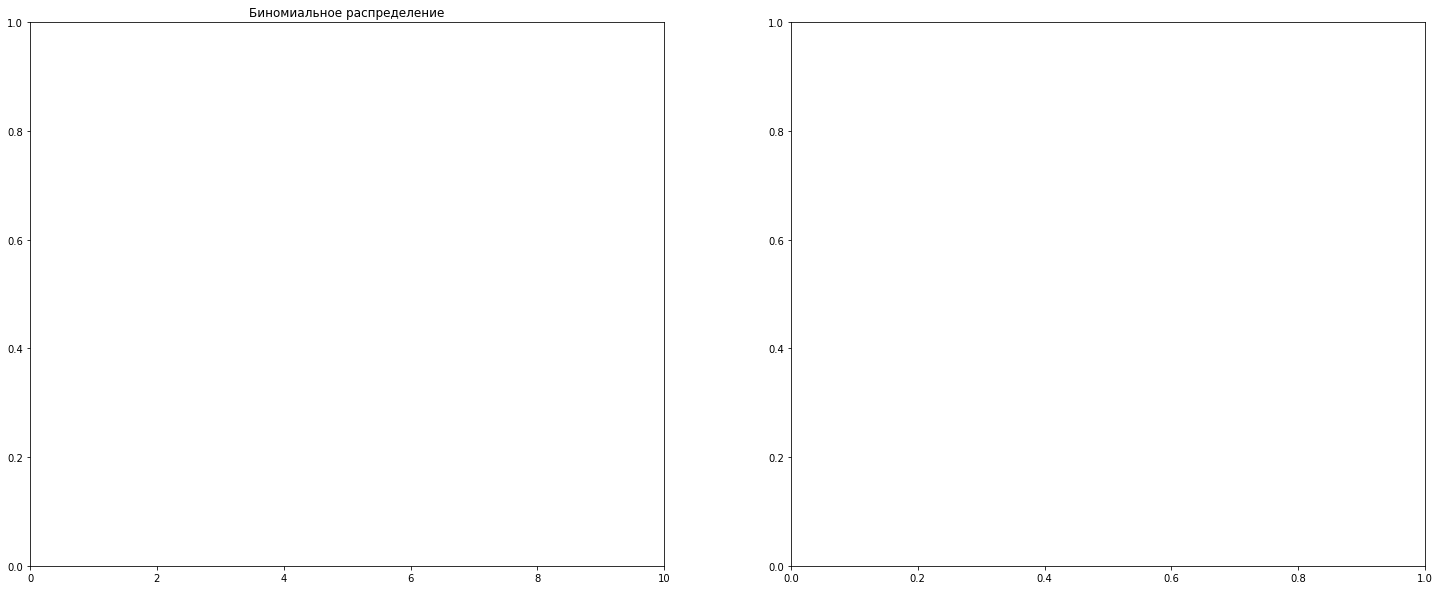

In [27]:
fig = plt.figure(figsize=(25,10))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

yMax = 1
xMax = 10


ax1.set(xlim = (0, xMax), ylim = (0, yMax), title = "Биномиальное распределение")


#line1, = ax1.plot([], [], 'r', lw=2)     # ax.plot returns a list of 2D line objects
#line2, = ax2.plot([], [], 'g', lw=2)
means = []
#line3, = ax3.plot([], [], 'b', lw=2)

# список размеров выборки
data_size = [10, 20, 40, 100, 1000, 10000, 100000]

In [28]:
# n - кол-во испытаний
# p - вероятность успеха
# size - размер выборки
def BinomLaw(n, p, size):
    binom_rvs = sps.binom.rvs(n, p, size=size)
    means.append(binom_rvs.mean())

    #x = list(range(size))
    #mult = xMax / size
    #x = [elem * mult for elem in x]
    #y = list(binom_rvs)

    return binom_rvs

In [31]:
# animation function. This is called sequentially
def drawframe(n):

    ax1.clear()
    ax1.set_xticks(np.arange(0, xMax, 1.0))
    ax1.set(xlim = (0, xMax), ylim = (0, yMax), title = "Выборка: " + str(data_size[n]))
    print('#####################')
    print("FRAME = ", n)
    rvs = BinomLaw(10, 0.5, data_size[n])
    
    ax1.hist(rvs, bins = 10, range=(0, xMax), rwidth=0.8, density=True)

    ax2.clear()
    ax2.set(xlim = (0, len(data_size)))
    ax2.set(ylim = (min(means) - 0.25, max(means) + 0.25))
    ax2.set_xticklabels(list(map(str, data_size)))
    ax2.hlines(y=sps.binom(10, 0.5).mean(), xmin=0, xmax=len(data_size), lw=1, colors='red')
    ax2.plot(means)


    #return line2,

In [33]:

from matplotlib import animation
from matplotlib import rc

means = []
anim = animation.FuncAnimation(fig, drawframe, frames = len(data_size), interval = 1000, blit=False)
#rc('animation', html='jshtml')
#plt.show()
anim.save('gif.gif', writer='imagemagick')

#####################
FRAME =  0
#####################
FRAME =  0


C:\Users\Bloodik\AppData\Local\Temp\ipykernel_14600\999609408.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(list(map(str, data_size)))


#####################
FRAME =  1
#####################
FRAME =  2
#####################
FRAME =  3
#####################
FRAME =  4
#####################
FRAME =  5
#####################
FRAME =  6
